
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### I will sereash about What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## let's start

In [1]:
#import the module that i will use
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('data.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
#exploring data
print('the shape of data is :',df.shape)
print('*'*40)
print('number of dublicated row is :',df.duplicated().sum())
print('*'*40)
print('the number of patient is :',df['PatientId'].nunique())
print('*'*40)
print('The number of dublicated rows of patients who attended and those who did not attend :',df.duplicated(['PatientId','No-show']).sum(),end=" ")
print('patients')
print('*'*40)
print('some information about null value and data type of data :')
df.info()
print('*'*40)
print('some information about our data:')
df.describe()


the shape of data is : (110527, 14)
****************************************
number of dublicated row is : 0
****************************************
the number of patient is : 62299
****************************************
The number of dublicated rows of patients who attended and those who did not attend : 38710 patients
****************************************
some information about null value and data type of data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we have some dublicated data fo patients shod be deleted..........

we have error in patient age , we should remove error data...........

we should change columns names to be easy to use.......

we have 62299 patients in our data.........

no any null value in our data........



### Data Cleaning (Replace this with more specific notes!)

In [4]:
#drop error age from our data
error_age=df[df['Age'] == -1]
df.drop(error_age.index,inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
#rename columns
df.rename(columns= lambda x:x.strip().lower().replace('-','_'),inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [6]:
#drop duplicated of attend and no attend patient
df.drop_duplicates(['patientid','no_show'],inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
#drop columns we don't need
df.drop(['scheduledday','appointmentday','appointmentid'],axis=1,inplace=True)
df.head(1)

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [8]:
#change the hipertension to hypertension
df.rename(columns={"hipertension":'hypertension'},inplace =True)	



In [9]:
#creat show and no_show patientid
show =df[df["no_show"] == "No"]
no_show=df[df["no_show"] == "Yes"]

In [10]:
df.head(5)

,patientid,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### General lock

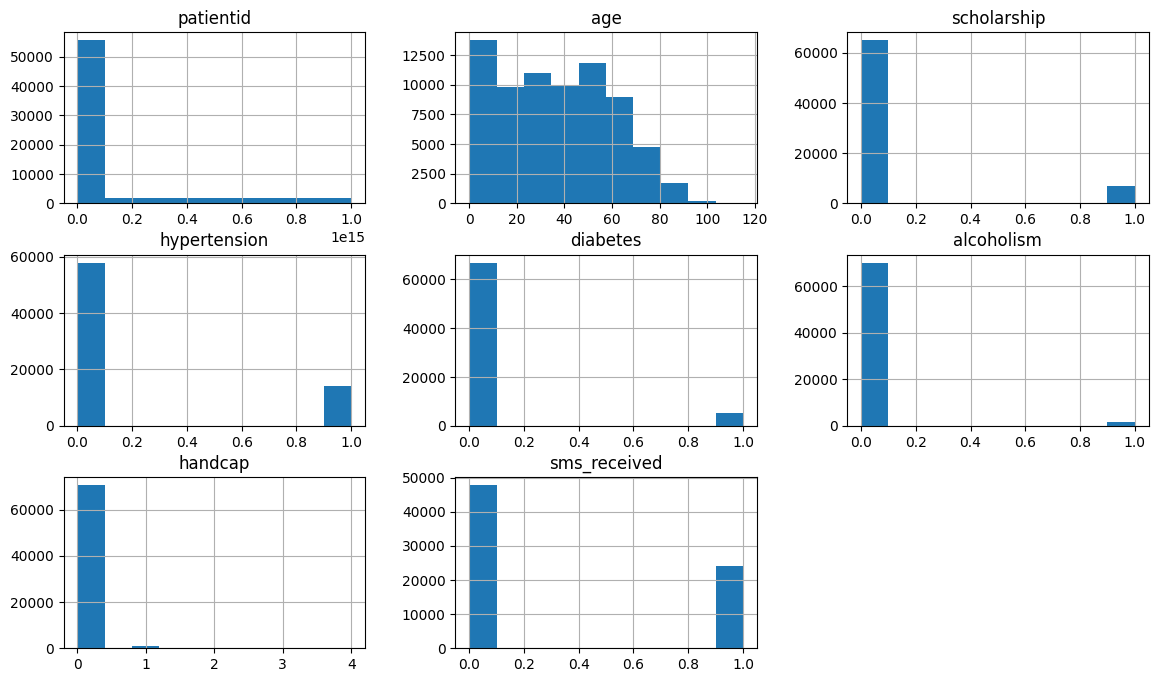

In [11]:
df.hist(figsize=(14,8));

In [92]:
#fuction that iam use
def bar(data_group,specific,head,x='',y=''):
    plt.figure(figsize=(14,8))
    show.groupby(data_group)[specific].mean().plot(kind='bar',color='#F5C605',label='Attend',alpha=0.7)
    no_show.groupby(data_group)[specific].mean().plot(kind='bar',color='#3A3EF5',label='Don\'t Attend',alpha=0.7)
    plt.legend()
    plt.title(head.upper(),fontsize=25)
    plt.xlabel(x,fontsize=15)
    plt.ylabel(y,fontsize=15);

def hist(specific,head,bi=10,x='',y=''):
    plt.figure(figsize=(14,8))
    show[specific].hist(color='#F5C605',label='Attend',alpha=0.6,bins=bi,edgecolor='Black')
    no_show[specific].hist(color='#3A3EF5',label='Don\'t Attend',alpha=0.6,bins=bi,edgecolor='Black')
    plt.legend()
    plt.title(head.upper(),fontsize=25)
    plt.xlabel(x,fontsize=15)
    plt.ylabel(y,fontsize=15);

### The effect of age on attendance


In [13]:
(show.describe())

,patientid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,5.415300e+04,54153.000000,54153.000000,54153.000000,54153.000000,54153.0000,54153.000000,54153.000000
mean,1.468194e+14,37.229166,0.091334,0.202944,0.072868,0.0236,0.020904,0.297232
std,2.546249e+14,23.710145,0.288086,0.402195,0.259921,0.1518,0.157326,0.457044
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,4.176779e+12,17.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,3.187962e+13,37.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
75%,9.465713e+13,56.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.0000,4.000000,1.000000


In [14]:
(no_show.describe())

,patientid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.766300e+04,17663.000000,17663.000000,17663.000000,17663.000000,17663.000000,17663.000000,17663.000000
mean,1.460285e+14,34.376267,0.108419,0.170922,0.065108,0.029440,0.017777,0.453094
std,2.540892e+14,22.192819,0.310917,0.376452,0.246723,0.169041,0.149058,0.497809
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175306e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.194149e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439503e+13,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
attend=show['patientid'].count()
not_attend=no_show['patientid'].count()
show_age=show['age'].mean()
noshow_age=no_show['age'].mean()
print(f'No.of showing patient is : {attend} patients ,No.of not showing patient is:{not_attend} patients.')
print('*'*100)
print(f'showing patient is {int(attend/not_attend)} times not showing patient.')
print('*'*100)
print(f'the mean avg of showing patient is: {show_age} years ,the mean avg of not showing patient is: {noshow_age} years.')


No.of showing patient is : 54153 patients ,No.of not showing patient is:17663 patients.
****************************************************************************************************
showing patient is 3 times not showing patient.
****************************************************************************************************
the mean avg of showing patient is: 37.22916551252931 years ,the mean avg of not showing patient is: 34.37626677234898 years.


In [15]:
show['age'].mean()

37.22916551252931

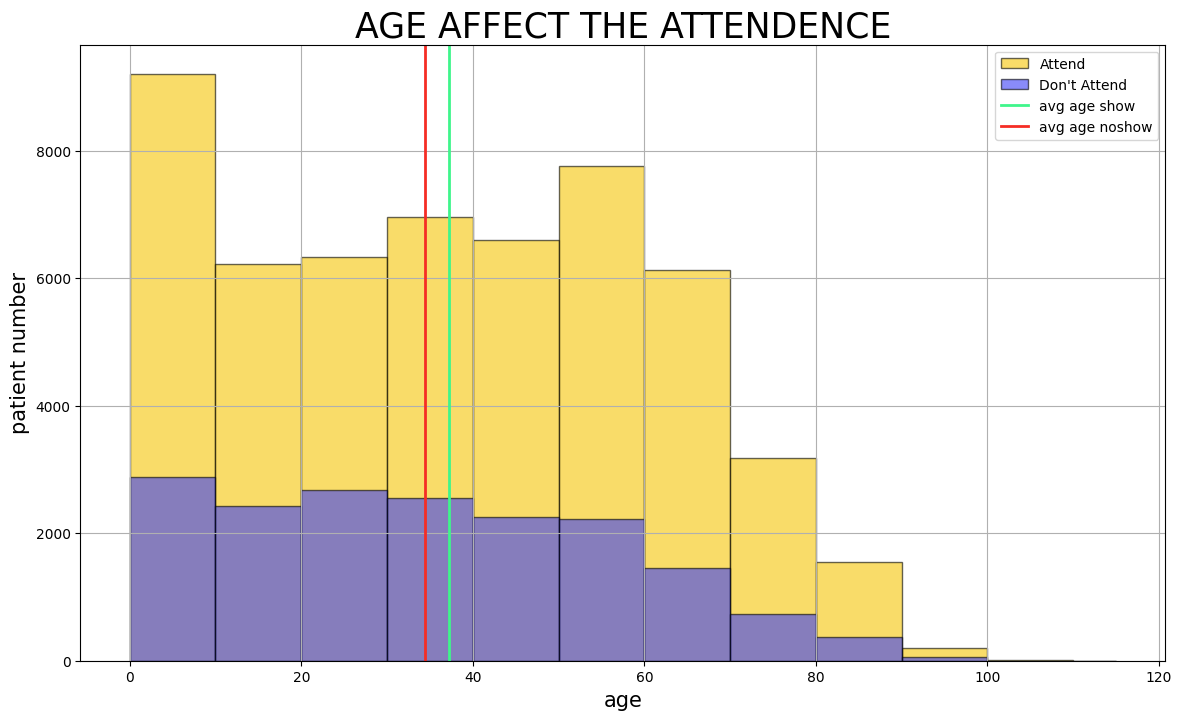

In [94]:
hist(specific='age',head='Age Affect The Attendence',x='age',y='patient number',bi=[0,10,20,30,40,50,60,70,80,90,100,110,115])
avg_show=show['age'].mean()
avg_noshow=no_show['age'].mean()
plt.axvline(avg_show,label='avg age show',color='#3FF58B',linewidth=2)
plt.axvline(avg_noshow,label='avg age noshow',color='#F52D25',linewidth=2)
plt.legend()

Patients with age up to ten years are the ones who attended the most,
And those ranging from forty-five to sixty attended, but not like the first category,
Patients with the highest age of sixty-five is the lowest attended category.

### The effect of receiving a message on attendees

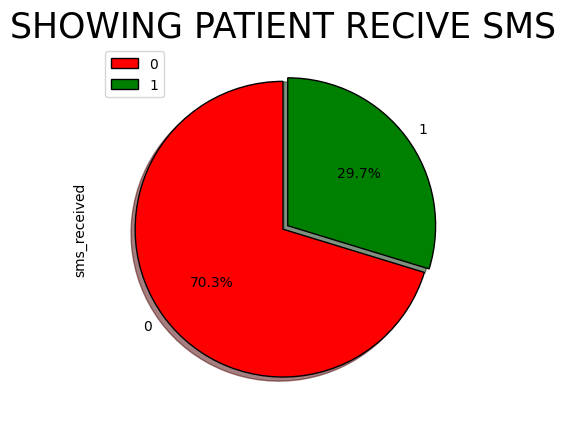

In [53]:
show['sms_received'].value_counts().plot(kind='pie',explode=[0,0.04],colors=['red','green'],shadow=True,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},startangle=90)
plt.legend()
plt.title('showing patient recive sms'.upper(),fontsize=25);
#plt.xlabel(x,fontsize=15)
#plt.ylabel(y,fontsize=15);

Text(0.5, 1.0, 'NOT SHWING PATIEND RECIVE SMS')

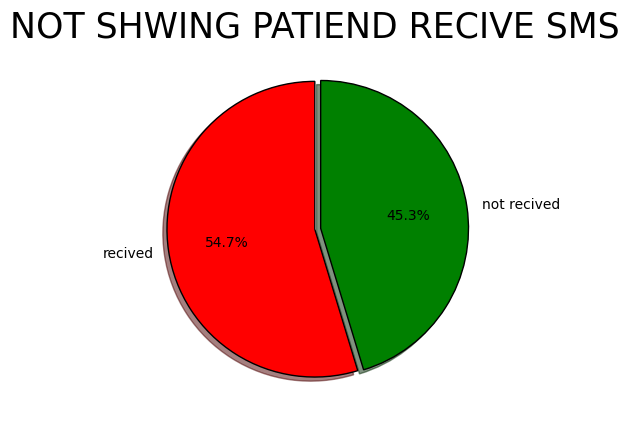

In [52]:
not_attend=no_show['sms_received'].value_counts()
plt.pie(not_attend,labels=['recived','not recived'],explode=[0,0.04],colors=['red','green'],shadow=True,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black'});
plt.title('not shwing patiend recive sms'.upper(),fontsize=25)

showing patient have not recive sms is greater than not showing patient have recive sms 

### The effect of patient have a scholarship on attendees

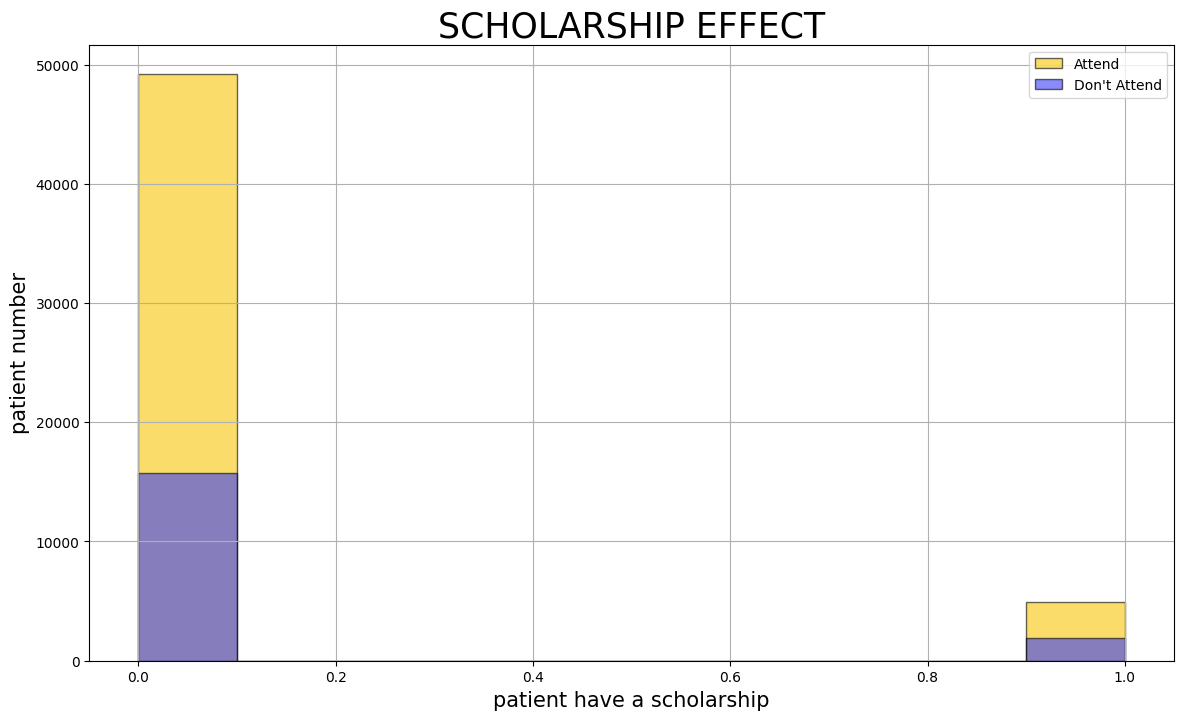

In [95]:
hist(specific='scholarship',head='scholarship effect',x='patient have a scholarship',y='patient number')

pscholarship ot necessary for showing patients لاecause the number of patients who do not have scholarship is great and the most of them attended.

### dose age and chronic diseases effect the attendence?

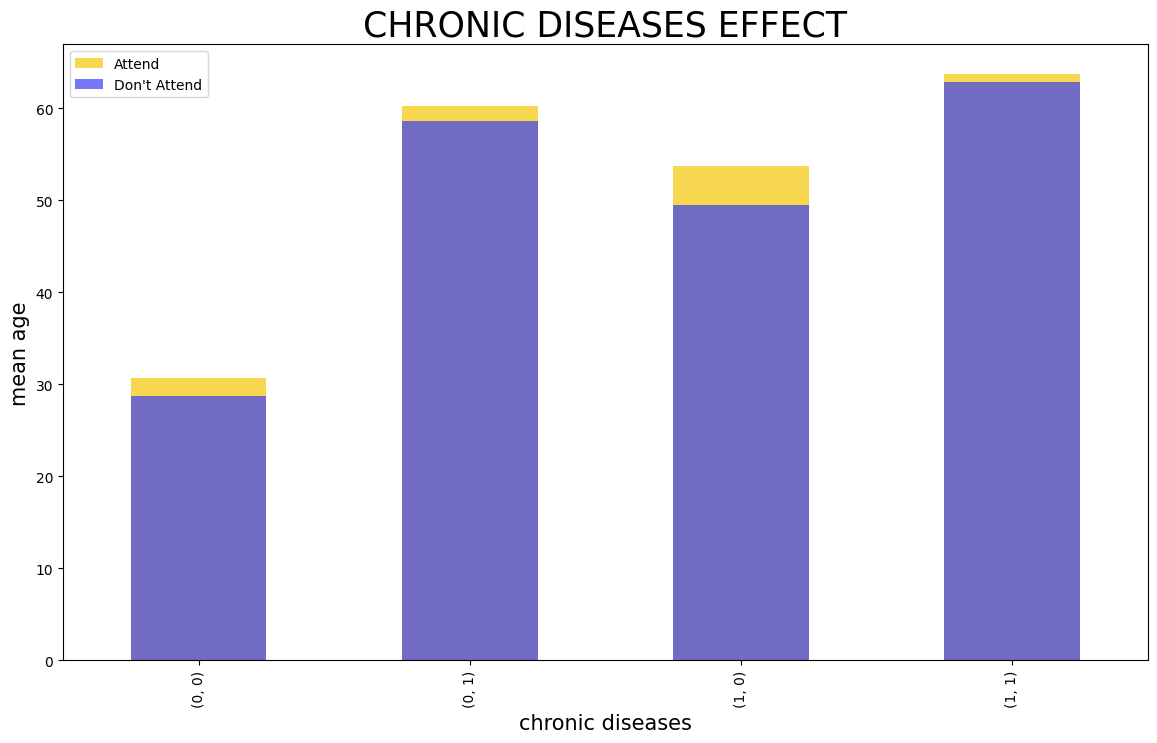

In [96]:
bar(data_group=['diabetes',"hypertension"],specific='age',head='chronic diseases effect',x='chronic diseases',y='mean age')

there is not correlation between chronic diseases and attending patient.

### Does neighbourhood and age affect attendance?

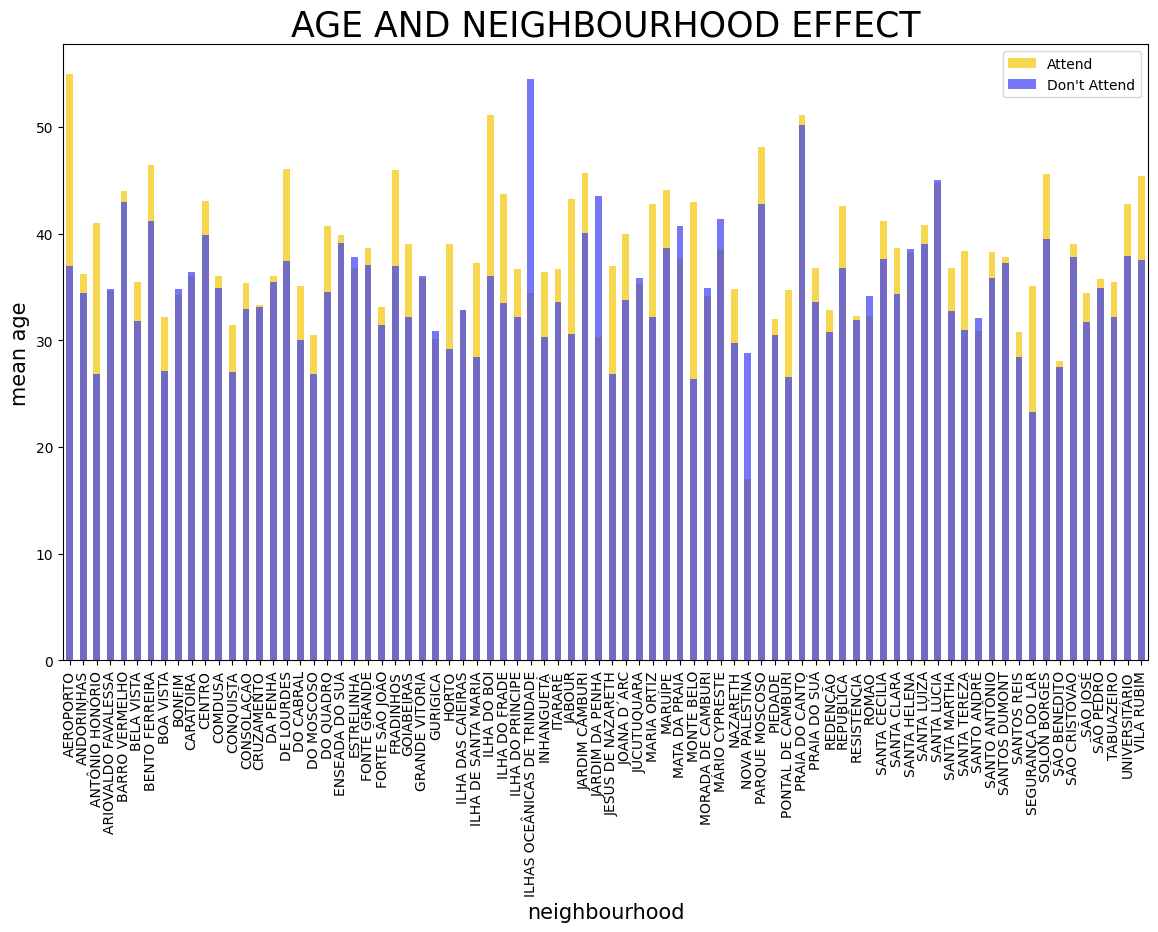

In [105]:
bar(data_group='neighbourhood',specific='age',head='age and neighbourhood effect',x='neighbourhood',y='mean age')

Patients' ages in relation to their place of residence negatively affect attendance for the examination appointment in six cities only.

neighbourhood have a great effect for the showing patient

jardim caamburi and maria ortiz have a great num of patient and agreat number of showing patient.

### dose gender effect in attendence?

In [22]:
show['gender'].describe(),no_show['gender'].describe()

(count     54153
 unique        2
 top           F
 freq      34960
 Name: gender, dtype: object,
 count     17663
 unique        2
 top           F
 freq      11506
 Name: gender, dtype: object)

In [23]:
avg_f=show[show['gender']=='F']['gender'].value_counts()/no_show[no_show['gender']=='F']['gender'].value_counts()
avg_m=show[show['gender']=='M']['gender'].value_counts()/no_show[no_show['gender']=='M']['gender'].value_counts()
print(avg_m)
avg_f

M    3.117265
Name: gender, dtype: float64


F    3.038415
Name: gender, dtype: float64

The attendance rate of men is almost equal to that of female patients


gender not effect on attendence

### dose age and gende effect the attendence?


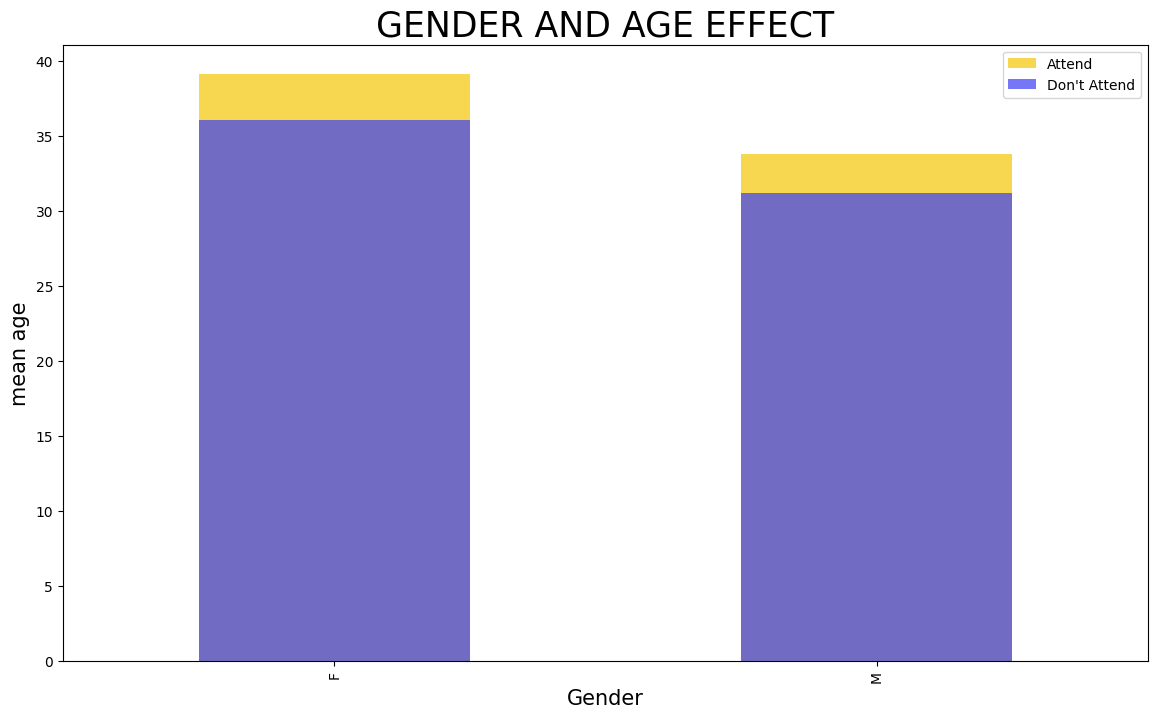

In [98]:
bar(data_group='gender',specific="age",head='gender and age effect',x='Gender',y='mean age')

gender and age have not great effect on attendence or not.

### dose neighbourhood and received sms effect on attendence?

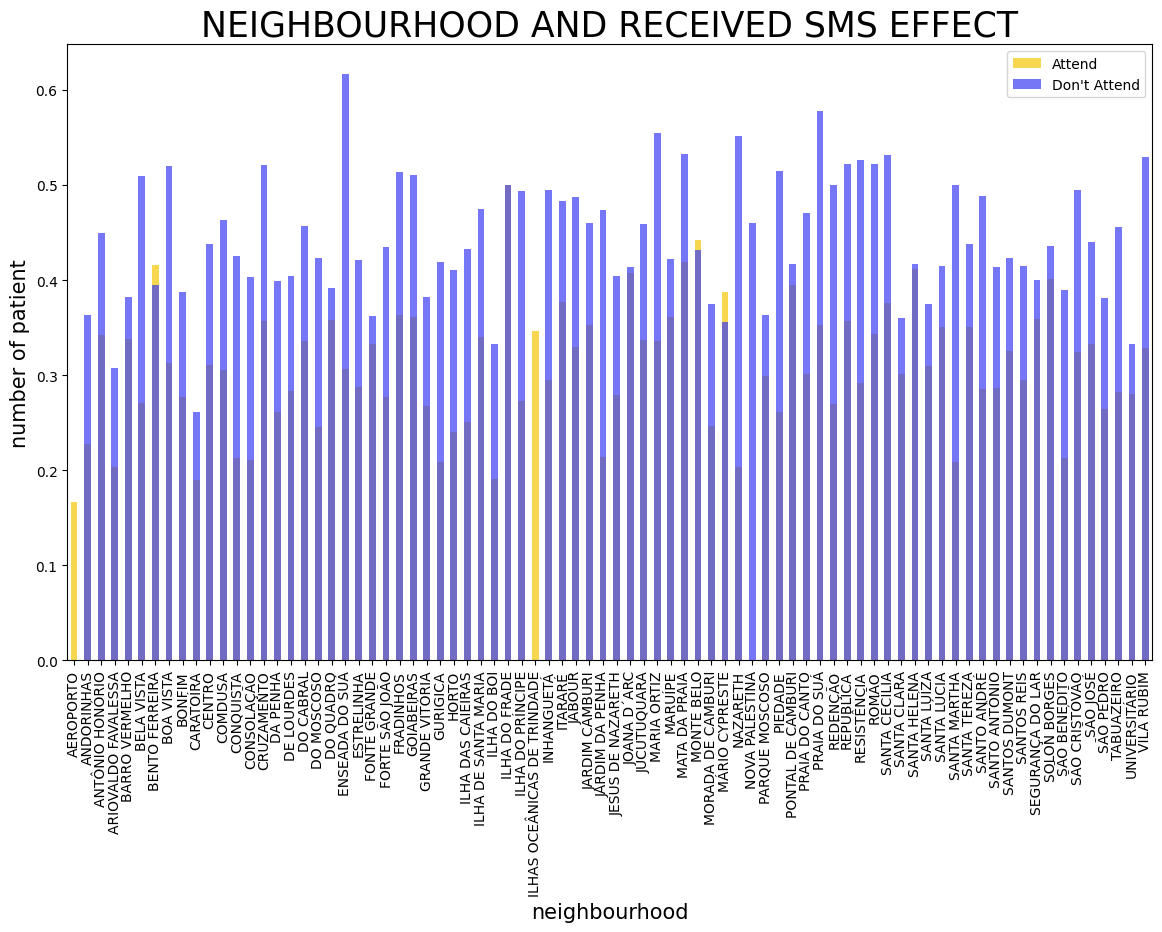

In [99]:
bar(data_group='neighbourhood',specific="sms_received",head='neighbourhood and received sms effect',x='neighbourhood',y='number of patient')

neighbourhood  and sms effect in only five cities

### dose age and handcap effect of shwing patient?

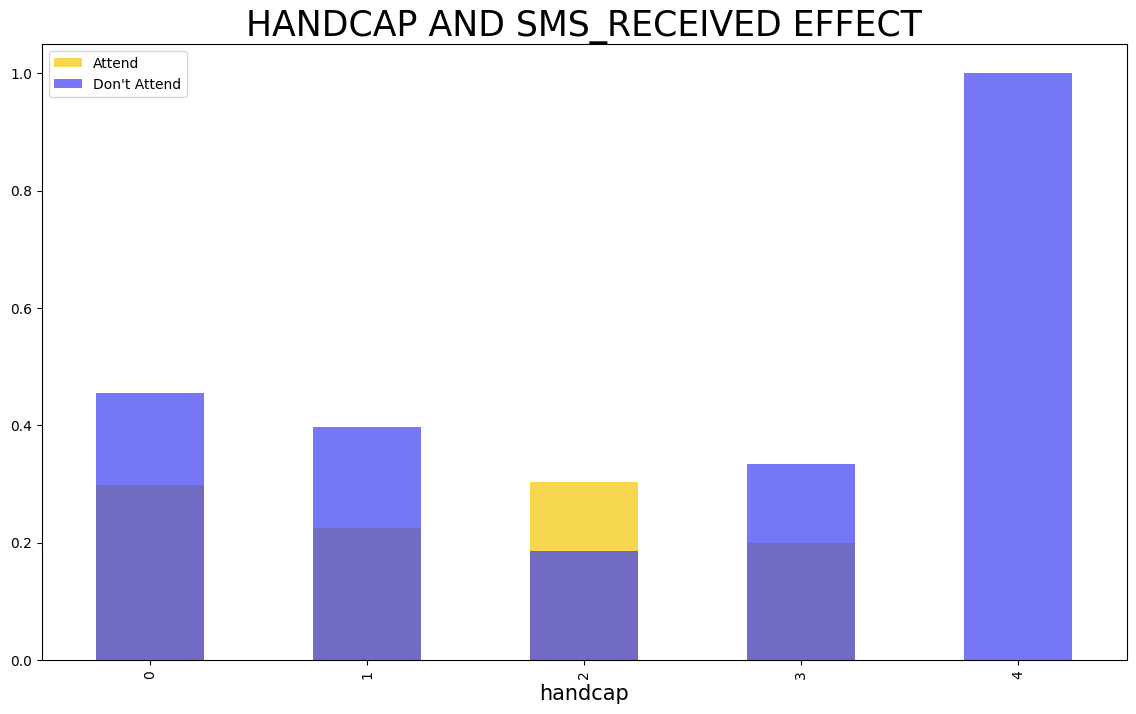

In [100]:
bar(data_group='handcap',specific="sms_received",head='handcap and sms_received effect',x='handcap',y='')

most of patient have handcap and recive sms not attend

### dose alcoholism effect on attendence?

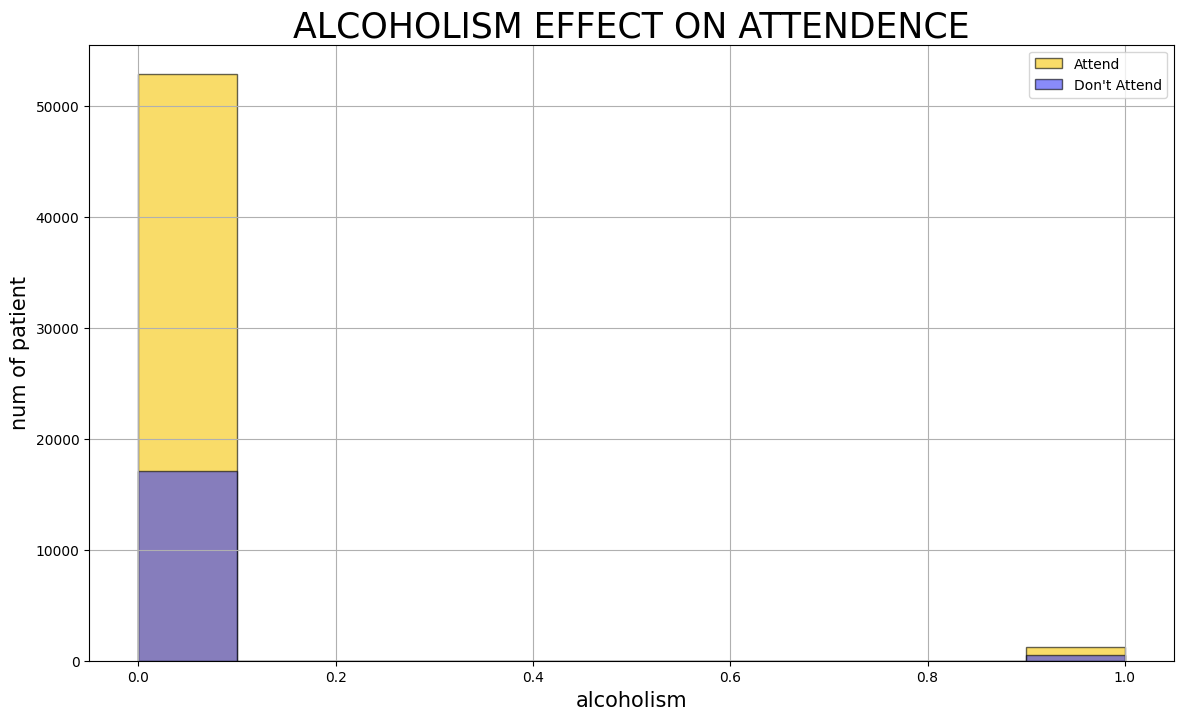

In [101]:
hist(specific='alcoholism',head='alcoholism effect on attendence',x='alcoholism',y='num of patient')

Patients who do not drink alcohol are more present than those who drink alcohol.

showing patients who do not drink alcohol is 3 times not showing patients

showing patients who drink alchol is 2.5 times not showing patients

<a id='conclusions'></a>
## Conclusions
we should revisit our sms compaghin because the num of showing patient without recive sms is greater than the num of showing patient with resive sms. 

number of showing patient from specific neighourhood affected by age and sms. 

gender not effect in showing patient.


scholarship not effect in showing patient most showing patient don't have scholarship 

Disabled patients differ in attendance according to their age and disability


### Limitiation

no clear corrlation between showing and gender, chronic diseases